# 탐색적 데이터 분석 사례 - 전국 실업률 분포 변화

다음 데이터는 2000년부터 2022년까지 지역에 따른 실업률 데이터이다. 

- 연령별 : https://blog.hossam.kr/data/unemployment_age.xlsx 
- 성별 : https://blog.hossam.kr/data/unemployment_sex.xlsx 

이 데이터를 토대로 년도에 따른 실업률이 어떻게 변화하였는지 분석하라

## #01. 데이터 분석 준비

### 패키지 가져오기

In [4]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb

### 데이터 가져오기

In [5]:
df = read_excel("https://data.hossam.kr/unemployment_age.xlsx", 
                index_col=[0, 1])
df

HTTPError: HTTP Error 404: Not Found

### 그래프 준비하기

In [ ]:
#plt.rcParams["font.family"] = 'Malgun Gothic'  # windows 한글 지원 폰트 설정
plt.rcParams["font.family"] = 'AppleGothic'  # mac 한글 지원 폰트 설정

plt.rcParams["font.size"] = 14               # 기본 글자크기 설정
plt.rcParams["figure.figsize"] = (24, 8)    # 그래프 사이즈 (가로,세로)inch
plt.rcParams["axes.unicode_minus"] = False   # 유니코드 뺄셈기호 표시 사용 안함(깨짐방지)

## #02. 데이터 전처리

### 1) 인덱스 해제

In [ ]:
df2 = df.reset_index()
df2.head()

,시도별,연령계층별,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,서울특별시,15 - 29세,8.1,8.4,8.2,8.8,8.9,8.9,8.8,7.4,...,8.7,10.4,9.3,10.3,10.1,10.1,8.8,9.1,9.0,6.8
1,서울특별시,30 - 59세,3.9,3.6,3,3.2,3.4,3.6,3.4,3.2,...,3,3.2,3.1,2.9,3.3,3.5,3.2,3.3,3.6,2.4
2,서울특별시,60세이상,2.9,1.9,2.3,1.9,2.1,2.1,2.6,1.7,...,2.5,2.8,3.2,2.8,3.6,4.0,4.3,4.7,5.1,3.6
3,부산광역시,15 - 29세,12.1,10.7,7.6,9,9.9,8.8,8.2,8.3,...,8.8,9,9.7,9.9,11.5,9.5,9.1,10.6,7.7,6.8
4,부산광역시,30 - 59세,5.5,4.2,2.9,2.9,3.1,3.3,3.2,3,...,3,3,3.1,2.8,3.2,3.2,2.4,2.9,2.4,2.2


### 2) 결측치 확인

In [ ]:
df2.isna().sum()

NameError: name 'df2' is not defined

In [ ]:
df3 = df2.drop('연령계층별', axis=1)
df3

,시도별,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,서울특별시,8.1,8.4,8.2,8.8,8.9,8.9,8.8,7.4,7.6,...,8.7,10.4,9.3,10.3,10.1,10.1,8.8,9.1,9.0,6.8
1,서울특별시,3.9,3.6,3,3.2,3.4,3.6,3.4,3.2,3,...,3,3.2,3.1,2.9,3.3,3.5,3.2,3.3,3.6,2.4
2,서울특별시,2.9,1.9,2.3,1.9,2.1,2.1,2.6,1.7,1.8,...,2.5,2.8,3.2,2.8,3.6,4.0,4.3,4.7,5.1,3.6
3,부산광역시,12.1,10.7,7.6,9,9.9,8.8,8.2,8.3,8.1,...,8.8,9,9.7,9.9,11.5,9.5,9.1,10.6,7.7,6.8
4,부산광역시,5.5,4.2,2.9,2.9,3.1,3.3,3.2,3,2.9,...,3,3,3.1,2.8,3.2,3.2,2.4,2.9,2.4,2.2
5,부산광역시,5.3,3.6,2.1,1.5,1,2.8,3.1,2.8,2,...,2.6,2.4,2.6,2.8,3.6,2.9,3.9,3.7,3.3,2.8
6,대구광역시,9.1,9.8,9.2,9.8,8.6,8.7,9.5,8.9,8.9,...,9.9,11.5,10.1,12,11.5,12.2,8.3,9.0,7.1,6.9
7,대구광역시,3.7,3.5,2.8,3,3.2,3.2,2.5,2.4,2.6,...,2.1,2.5,2.2,2.5,2.7,2.9,2.9,3.0,2.8,2.1
8,대구광역시,0.7,1.2,1.4,2.2,1.6,2.5,1.6,2,1.8,...,2.2,2.1,2.5,3.8,3.4,3.7,3.1,3.2,4.6,2.9
9,인천광역시,8.2,8.2,7.9,8.8,8.3,8.3,9.2,8.3,7.7,...,9.3,12.1,11.8,11.5,10.5,9.2,9.0,8.6,7.9,6.7


In [ ]:
df4 = df3.replace("-", 0)
df4

,시도별,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,서울특별시,8.1,8.4,8.2,8.8,8.9,8.9,8.8,7.4,7.6,...,8.7,10.4,9.3,10.3,10.1,10.1,8.8,9.1,9.0,6.8
1,서울특별시,3.9,3.6,3.0,3.2,3.4,3.6,3.4,3.2,3.0,...,3.0,3.2,3.1,2.9,3.3,3.5,3.2,3.3,3.6,2.4
2,서울특별시,2.9,1.9,2.3,1.9,2.1,2.1,2.6,1.7,1.8,...,2.5,2.8,3.2,2.8,3.6,4.0,4.3,4.7,5.1,3.6
3,부산광역시,12.1,10.7,7.6,9.0,9.9,8.8,8.2,8.3,8.1,...,8.8,9.0,9.7,9.9,11.5,9.5,9.1,10.6,7.7,6.8
4,부산광역시,5.5,4.2,2.9,2.9,3.1,3.3,3.2,3.0,2.9,...,3.0,3.0,3.1,2.8,3.2,3.2,2.4,2.9,2.4,2.2
5,부산광역시,5.3,3.6,2.1,1.5,1.0,2.8,3.1,2.8,2.0,...,2.6,2.4,2.6,2.8,3.6,2.9,3.9,3.7,3.3,2.8
6,대구광역시,9.1,9.8,9.2,9.8,8.6,8.7,9.5,8.9,8.9,...,9.9,11.5,10.1,12.0,11.5,12.2,8.3,9.0,7.1,6.9
7,대구광역시,3.7,3.5,2.8,3.0,3.2,3.2,2.5,2.4,2.6,...,2.1,2.5,2.2,2.5,2.7,2.9,2.9,3.0,2.8,2.1
8,대구광역시,0.7,1.2,1.4,2.2,1.6,2.5,1.6,2.0,1.8,...,2.2,2.1,2.5,3.8,3.4,3.7,3.1,3.2,4.6,2.9
9,인천광역시,8.2,8.2,7.9,8.8,8.3,8.3,9.2,8.3,7.7,...,9.3,12.1,11.8,11.5,10.5,9.2,9.0,8.6,7.9,6.7


In [ ]:
df5 = df4.groupby('시도별').mean()
df5

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
시도별,,,,,,,,,,,,,,,,,,,,,
강원도,2.766667,2.333333,2.100000,2.566667,2.633333,2.133333,1.666667,2.600000,2.200000,2.866667,...,3.600000,4.766667,5.566667,4.533333,3.900000,3.733333,4.933333,5.366667,4.966667,4.500000
경기도,4.033333,3.533333,2.933333,3.766667,4.200000,4.133333,4.033333,3.900000,3.566667,4.633333,...,3.766667,4.366667,5.000000,5.233333,5.533333,5.033333,5.100000,5.100000,4.866667,3.566667
경상남도,3.233333,3.300000,2.733333,2.800000,2.800000,3.033333,2.966667,3.033333,2.633333,3.500000,...,2.800000,3.433333,3.900000,4.233333,4.266667,4.566667,5.333333,5.433333,5.100000,4.233333
경상북도,3.900000,3.100000,2.600000,2.800000,3.233333,3.100000,3.433333,2.866667,2.866667,3.500000,...,4.700000,3.833333,4.200000,4.666667,4.333333,6.033333,5.733333,5.666667,4.366667,3.733333
광주광역시,6.366667,4.866667,3.766667,4.866667,4.366667,4.466667,4.900000,4.966667,4.466667,4.566667,...,3.966667,3.966667,3.866667,4.800000,3.900000,4.800000,5.033333,4.966667,4.800000,3.866667
대구광역시,4.500000,4.833333,4.466667,5.000000,4.466667,4.800000,4.533333,4.433333,4.433333,4.966667,...,4.733333,5.366667,4.933333,6.100000,5.866667,6.266667,4.766667,5.066667,4.833333,3.966667
대전광역시,4.633333,4.766667,3.900000,3.600000,4.633333,4.900000,4.800000,4.600000,4.266667,4.633333,...,4.000000,4.666667,4.633333,4.233333,4.500000,5.566667,5.566667,5.166667,4.233333,3.000000
부산광역시,7.633333,6.166667,4.200000,4.466667,4.666667,4.966667,4.833333,4.700000,4.333333,4.900000,...,4.800000,4.800000,5.133333,5.166667,6.100000,5.200000,5.133333,5.733333,4.466667,3.933333
서울특별시,4.966667,4.633333,4.500000,4.633333,4.800000,4.866667,4.933333,4.100000,4.133333,4.700000,...,4.733333,5.466667,5.200000,5.333333,5.666667,5.866667,5.433333,5.700000,5.900000,4.266667


## #03. 지역별 실업률 변화

In [ ]:
# 전치 구하기
df6 = df5.T
df6

시도별,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주도,충청남도,충청북도
2000,2.766667,4.033333,3.233333,3.900000,6.366667,4.500000,4.633333,7.633333,4.966667,0.000000,4.933333,5.533333,4.033333,3.700000,2.700000,3.233333,3.600000
2001,2.333333,3.533333,3.300000,3.100000,4.866667,4.833333,4.766667,6.166667,4.633333,0.000000,4.133333,4.766667,3.733333,3.900000,2.566667,3.600000,3.733333
2002,2.100000,2.933333,2.733333,2.600000,3.766667,4.466667,3.900000,4.200000,4.500000,0.000000,3.066667,4.500000,3.100000,3.266667,2.366667,3.133333,3.000000
2003,2.566667,3.766667,2.800000,2.800000,4.866667,5.000000,3.600000,4.466667,4.633333,0.000000,3.533333,4.700000,3.166667,3.466667,2.166667,3.466667,3.433333
2004,2.633333,4.200000,2.800000,3.233333,4.366667,4.466667,4.633333,4.666667,4.800000,0.000000,3.833333,4.966667,3.466667,3.833333,2.766667,2.900000,3.333333
2005,2.133333,4.133333,3.033333,3.100000,4.466667,4.800000,4.900000,4.966667,4.866667,0.000000,4.333333,5.100000,3.200000,3.033333,2.700000,3.333333,2.833333
2006,1.666667,4.033333,2.966667,3.433333,4.900000,4.533333,4.800000,4.833333,4.933333,0.000000,3.533333,5.033333,2.500000,4.033333,2.300000,2.900000,2.900000
2007,2.600000,3.900000,3.033333,2.866667,4.966667,4.433333,4.600000,4.700000,4.100000,0.000000,3.000000,4.566667,2.566667,3.066667,2.600000,2.766667,3.066667
2008,2.200000,3.566667,2.633333,2.866667,4.466667,4.433333,4.266667,4.333333,4.133333,0.000000,4.366667,4.433333,3.033333,3.233333,1.900000,2.966667,2.966667
2009,2.866667,4.633333,3.500000,3.500000,4.566667,4.966667,4.633333,4.900000,4.700000,0.000000,5.166667,5.133333,2.400000,3.200000,1.900000,3.833333,2.733333


In [ ]:
# 전치에 대한 인덱스 이름 변경
df6.index.name = '년도'
df6

시도별,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주도,충청남도,충청북도
년도,,,,,,,,,,,,,,,,,
2000,2.766667,4.033333,3.233333,3.900000,6.366667,4.500000,4.633333,7.633333,4.966667,0.000000,4.933333,5.533333,4.033333,3.700000,2.700000,3.233333,3.600000
2001,2.333333,3.533333,3.300000,3.100000,4.866667,4.833333,4.766667,6.166667,4.633333,0.000000,4.133333,4.766667,3.733333,3.900000,2.566667,3.600000,3.733333
2002,2.100000,2.933333,2.733333,2.600000,3.766667,4.466667,3.900000,4.200000,4.500000,0.000000,3.066667,4.500000,3.100000,3.266667,2.366667,3.133333,3.000000
2003,2.566667,3.766667,2.800000,2.800000,4.866667,5.000000,3.600000,4.466667,4.633333,0.000000,3.533333,4.700000,3.166667,3.466667,2.166667,3.466667,3.433333
2004,2.633333,4.200000,2.800000,3.233333,4.366667,4.466667,4.633333,4.666667,4.800000,0.000000,3.833333,4.966667,3.466667,3.833333,2.766667,2.900000,3.333333
2005,2.133333,4.133333,3.033333,3.100000,4.466667,4.800000,4.900000,4.966667,4.866667,0.000000,4.333333,5.100000,3.200000,3.033333,2.700000,3.333333,2.833333
2006,1.666667,4.033333,2.966667,3.433333,4.900000,4.533333,4.800000,4.833333,4.933333,0.000000,3.533333,5.033333,2.500000,4.033333,2.300000,2.900000,2.900000
2007,2.600000,3.900000,3.033333,2.866667,4.966667,4.433333,4.600000,4.700000,4.100000,0.000000,3.000000,4.566667,2.566667,3.066667,2.600000,2.766667,3.066667
2008,2.200000,3.566667,2.633333,2.866667,4.466667,4.433333,4.266667,4.333333,4.133333,0.000000,4.366667,4.433333,3.033333,3.233333,1.900000,2.966667,2.966667


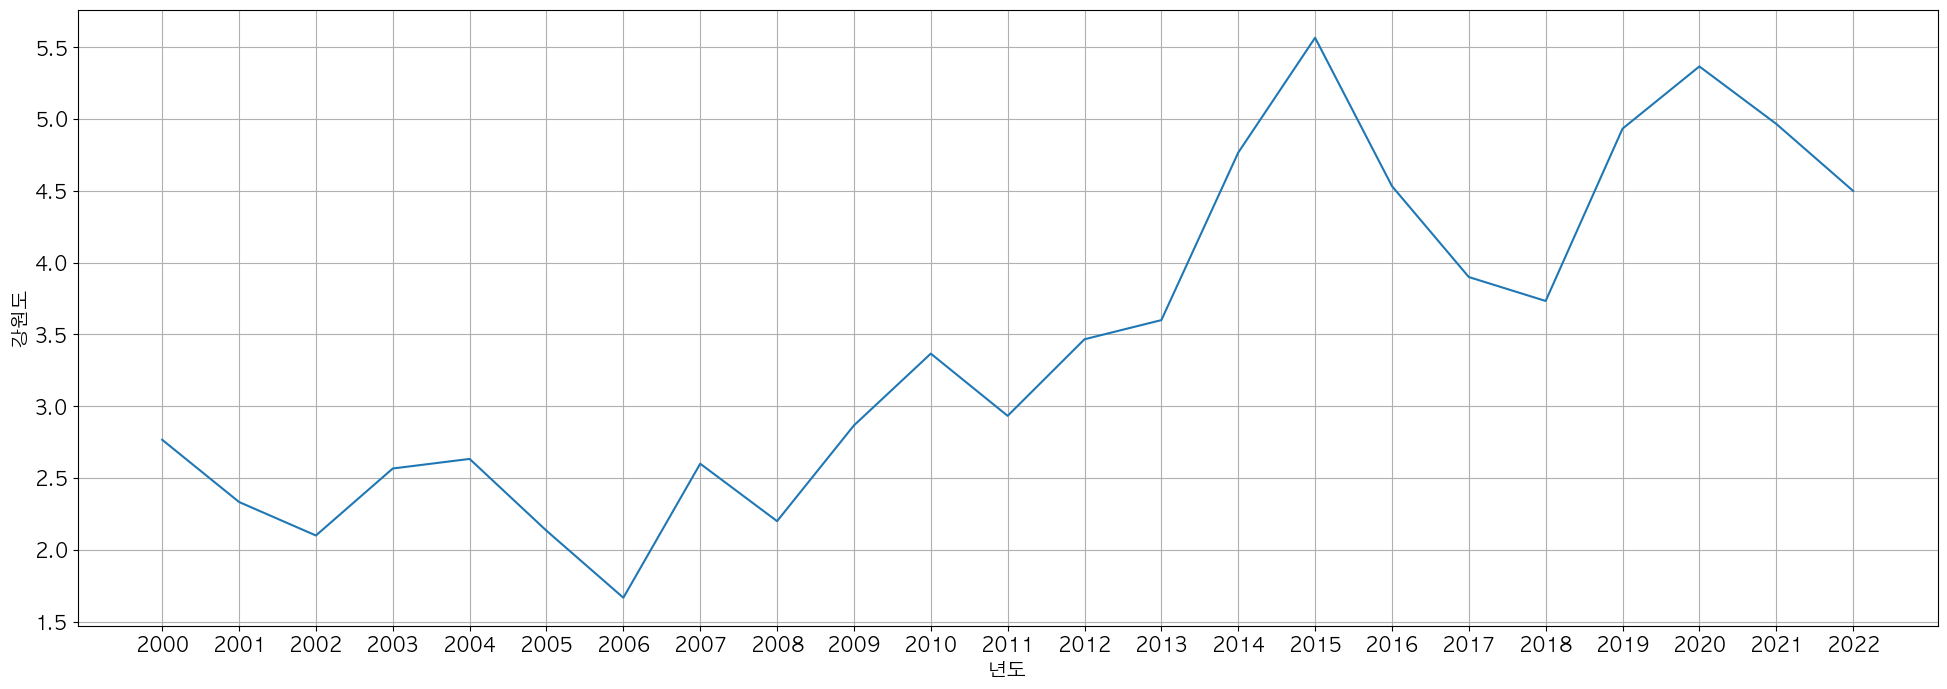

In [ ]:
sb.lineplot(data=df6, x=df6.index, y='강원도')
plt.grid()
plt.show()
plt.close()

In [ ]:
size = len(df6.columns)
min_year = min(df6.index.astype(int))
max_year = max(df6.index.astype(int))
x_labels = list(range(min_year, max_year+1))
x_values = list(range(0, len(x_labels)))

print(x_values)
print(x_labels)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


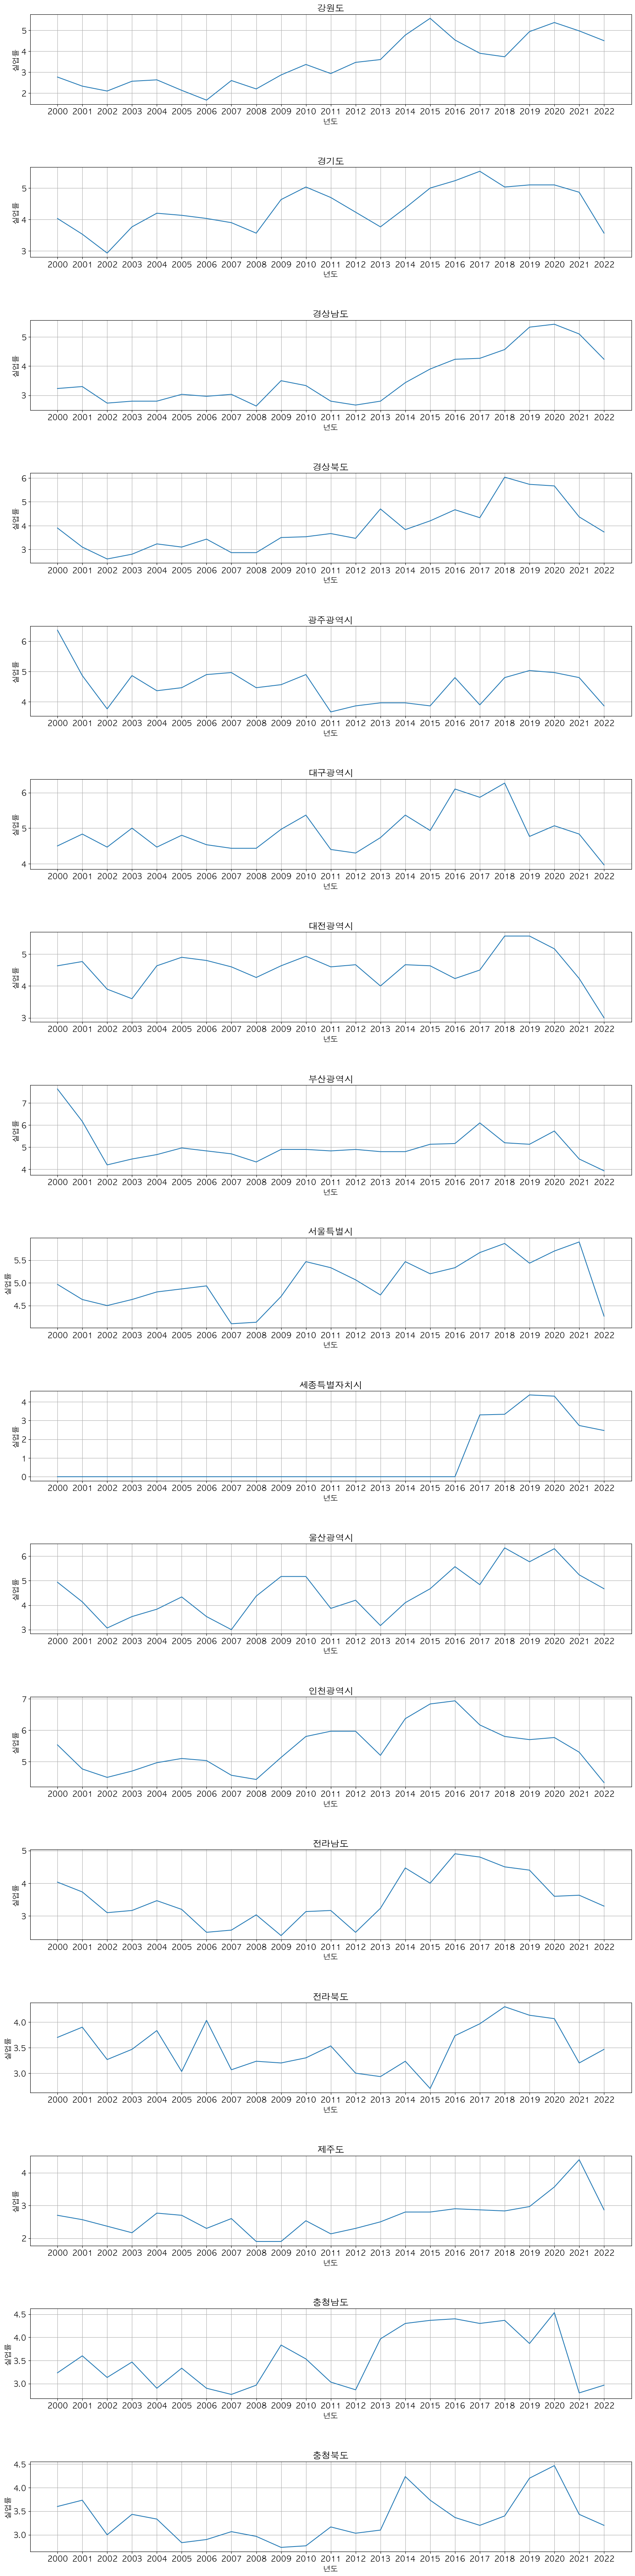

In [ ]:
fig, ax = plt.subplots(size, 1, figsize=(20, 5 * size))
fig.subplots_adjust(hspace=0.7)

for i, v in enumerate(df6.columns):
    sb.lineplot(data=df6, x=df6.index, y=v, ax=ax[i])
    ax[i].grid()
    ax[i].title.set_text(v)
    ax[i].set(xlabel='년도', ylabel='실업률')
    ax[i].set_xticks(x_values)
    ax[i].set_xticklabels(x_labels)

plt.show()
plt.close()

In [ ]:
import math
rows = math.ceil(len(df6.columns) / 2)
rows

9

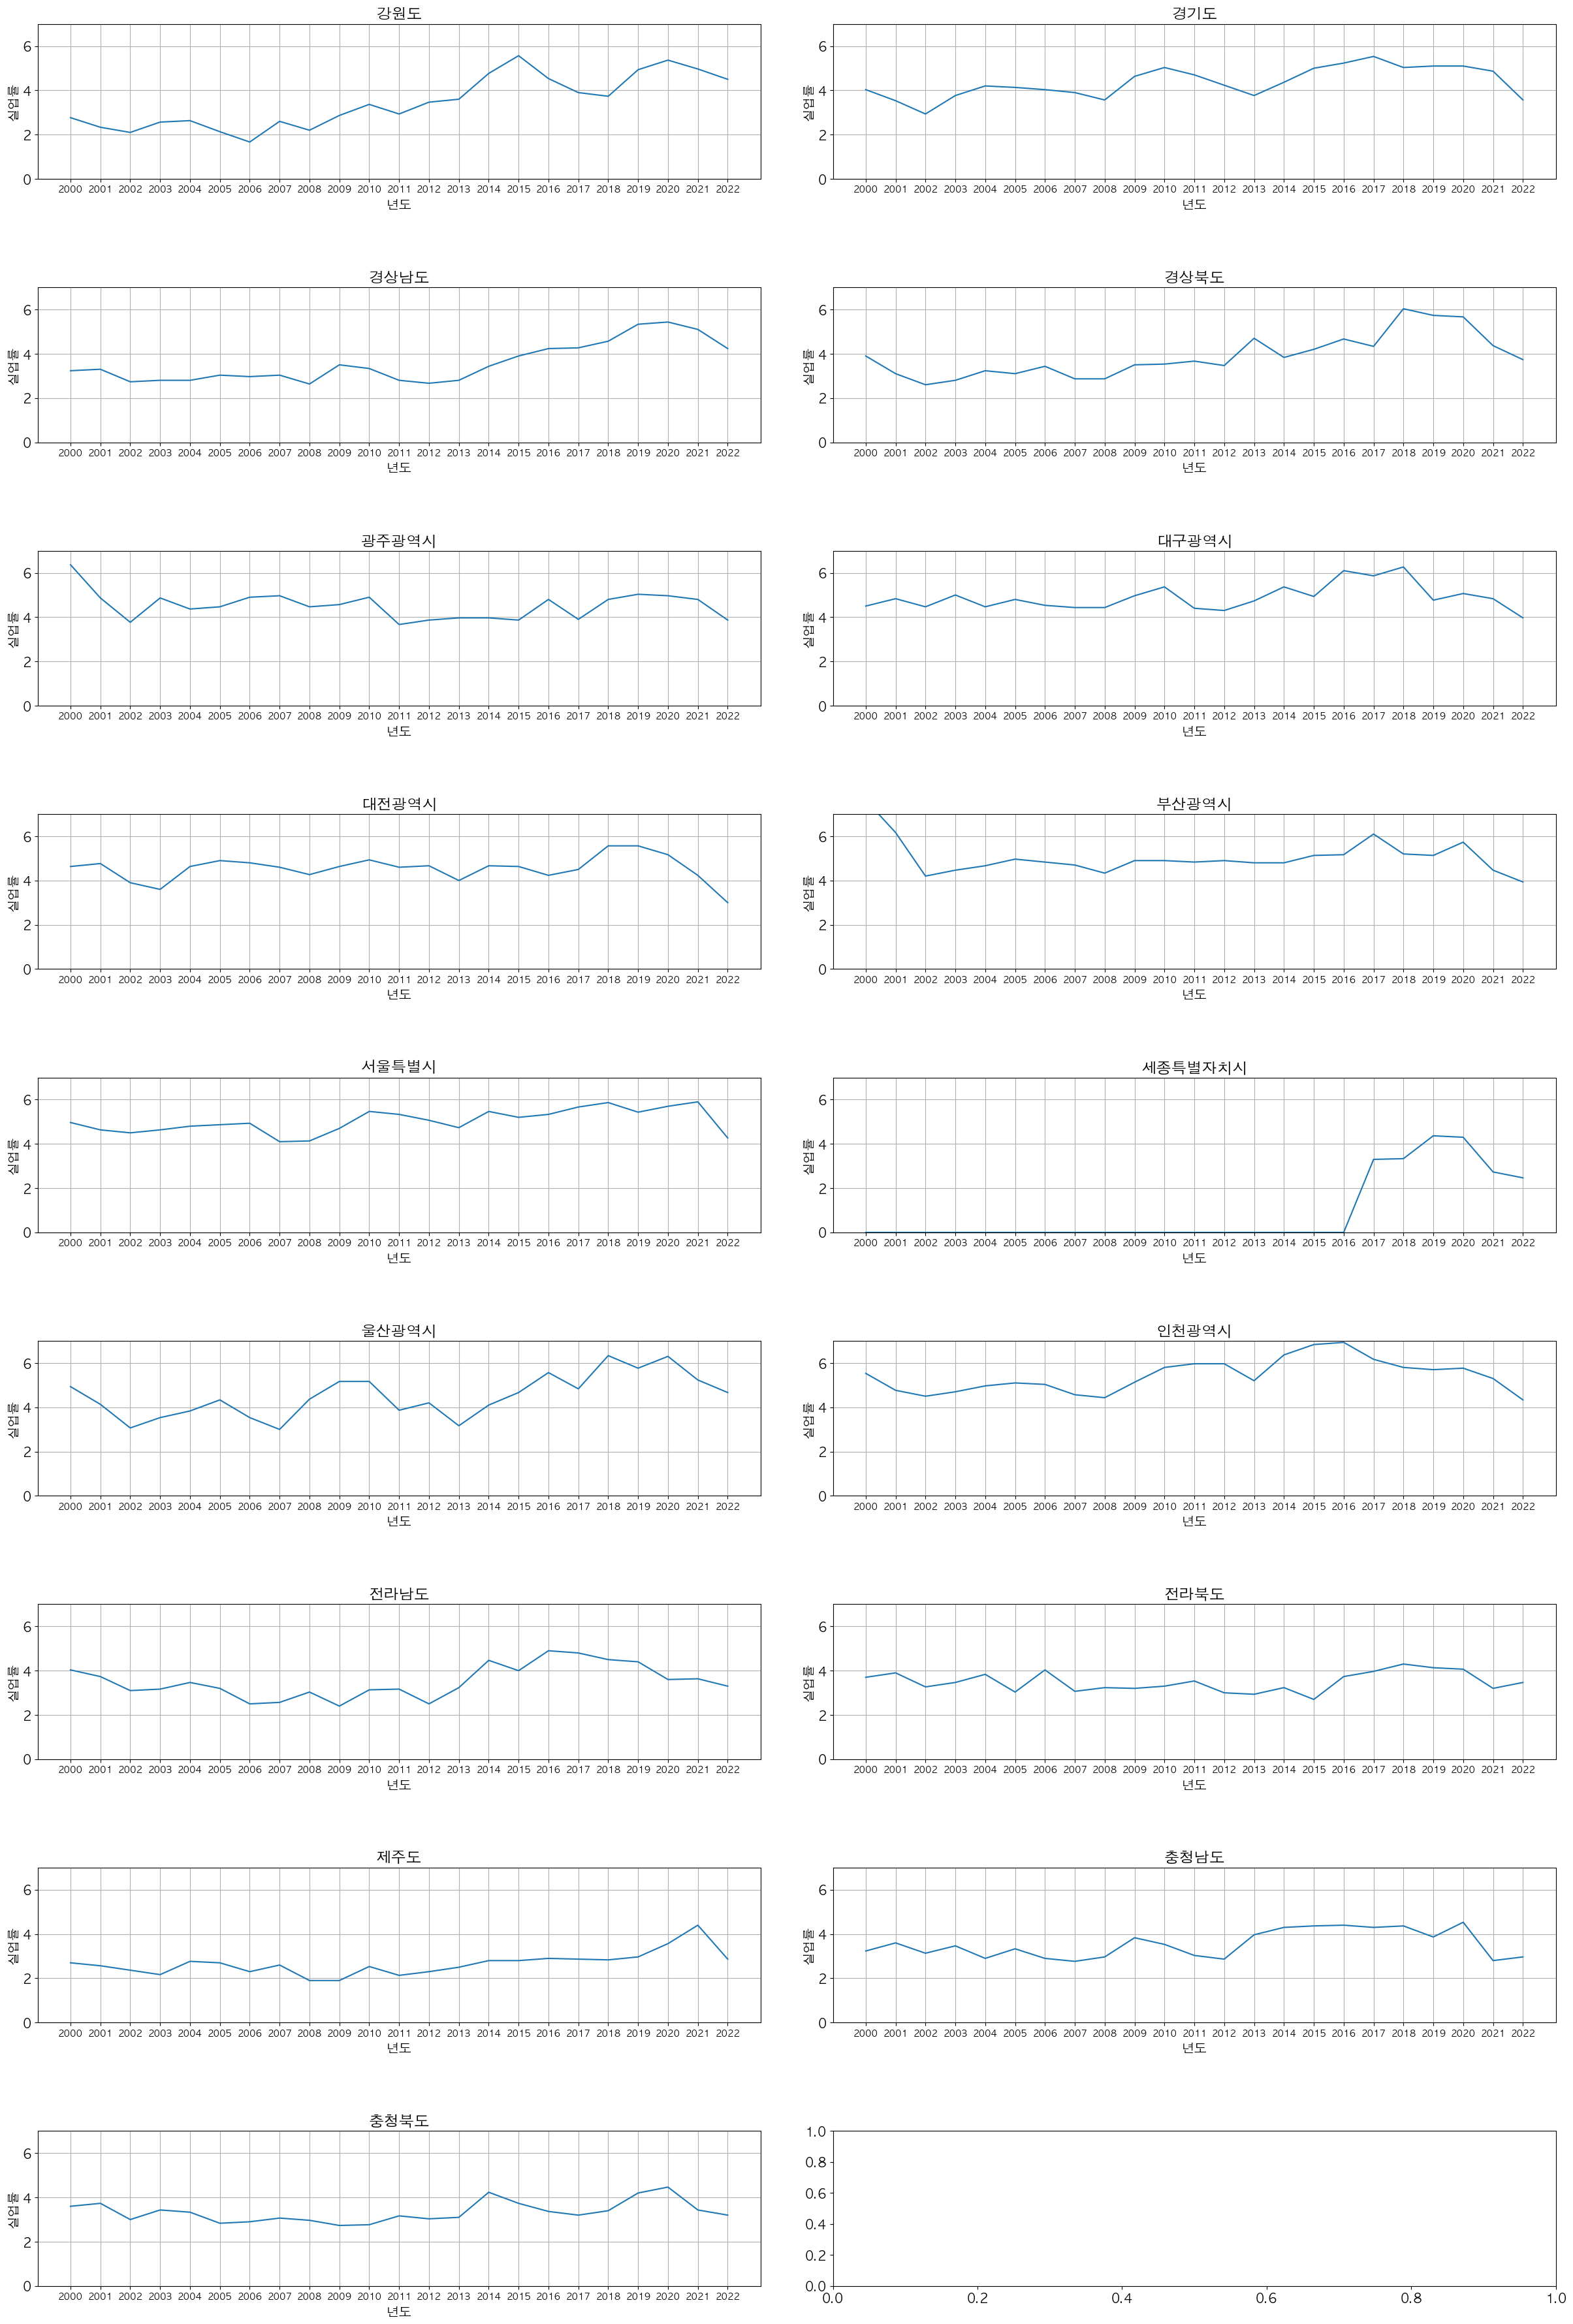

In [ ]:
fig, ax = plt.subplots(rows, 2, figsize=(30, 5 * rows))
fig.subplots_adjust(wspace=0.1, hspace=0.7)

column_names = df6.columns
x = 0

for i in range(0, rows):
    for j in range(0, 2):
        if x >= len(column_names):
            break
        
        key = column_names[x]
        x += 1

        sb.lineplot(data=df6, x=df6.index, y=key, ax=ax[i][j])
        ax[i][j].grid()
        ax[i][j].title.set_text(key)
        ax[i][j].set(xlabel='년도', ylabel='실업률')
        ax[i][j].set_ylim(0, 7)
        ax[i][j].set_xticks(x_values)
        ax[i][j].set_xticklabels(x_labels, fontsize=10)

plt.show()
plt.close()